# VPG

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
import gym


from model import MLPActor, MLPCritic
from utils import train_one_epoch
import joblib

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
USE_CUDA = torch.cuda.is_available()
device = 'cuda' if USE_CUDA else 'cpu'
device = torch.device(device)

In [4]:
def plot(rewards):
    clear_output(True)
#     plt.figure(figsize=(20,5))
#     plt.subplot(131)
    plt.title('avg. rewards')
    plt.plot(rewards)
#     plt.subplot(132)
#     plt.title('loss')
#     plt.plot(losses)
    plt.show()

## Lunar Lander

In [4]:
env_id = "LunarLander-v2"
env = gym.make(env_id)

In [6]:
actor = MLPActor(env.observation_space.shape[0], 1, 32, nn.PReLU, env.action_space.n, device).to(device)

In [7]:
critic = MLPCritic(env.observation_space.shape[0], 1, 32, nn.PReLU, 1, device).to(device)

In [8]:
actor.load_state_dict(torch.load('saved_models/best_actor.pt'))
critic.load_state_dict(torch.load('saved_models/best_critic.pt'))


<All keys matched successfully>

In [9]:
NUM_EPOCS = 50
BATCH_SIZE = 5000
CRITIC_ITERS = 10

In [10]:
actor_optimizer = Adam(actor.parameters(), lr=1e-3)
critic_optimizer = Adam(critic.parameters(), lr=1e-3)

In [11]:
with open('saved_models/best_avg_rew.pkl', 'rb') as barf:
    best_avg_rew = float(joblib.load(barf))
print(best_avg_rew)

45.0


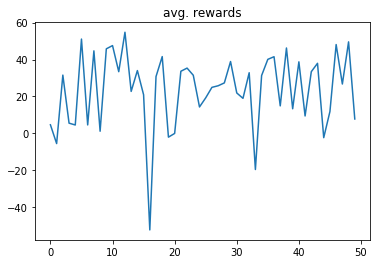

In [13]:
avg_rew_list = []
for epoch in range(NUM_EPOCS):
    avg_rew = train_one_epoch(BATCH_SIZE, actor, critic, env, 
                              actor_optimizer, critic_optimizer, 
                              CRITIC_ITERS)
    if avg_rew > best_avg_rew:
        print(best_avg_rew)
        torch.save(actor.state_dict(), 'saved_models/best_actor.pt')
        torch.save(critic.state_dict(), 'saved_models/best_critic.pt')
        best_avg_rew = avg_rew
        with open('saved_models/best_avg_rew.pkl', 'wb') as barf:
            joblib.dump(best_avg_rew, barf)

    avg_rew_list.append(avg_rew)
    plot(avg_rew_list)

## Pong

In [ ]:
env_id = "PongNoFrameskip-v4"
env    = make_atari(env_id)
env    = wrap_deepmind(env)
env    = wrap_pytorch(env)